In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});

# Russia Real Estate 2021 Regression

## 1.EDA

В датасете собраны [данные о жилой недвижимости в регионах России в 2021 г.](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021)

Структура данных  
date - дата внесения записи о характеристиках помещения  
price - цена  
level - этаж помещения  
levels - число этажей в здании  
rooms - число комнат в помещении (метка "-1" присвоена квартирам-студиям)  
area - площадь квартиры  
kitchen_area - площадь кухни  
geo_lat - координата широты расположения объекта  
geo_lon - координата долготы расположения объекта  
building_type - тип фасада здания: 0 - Don't know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden  
object_type - первичка ('0') или вторичка ('2')  
postal_code - почтовый индекс  
street_id - иденитфикатор улицы
id_region - код региона  
house_id - идентификатор здания

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Russia Real Estate 2021.csv', delimiter=';')

In [ ]:
df = pd.DataFrame(df[:113500])  # для удобства работы возьмём лишь 113 тыс. строк из более чем 11 млн
df.head(5)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.7801,60.6994,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.6082,40.1384,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.5401,37.7251,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.6082,40.1384,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.7387,37.7137,3,2,353960.0,439378.0,23,1730985.0


In [ ]:
df.shape

(113500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113500 entries, 0 to 113499
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           113500 non-null  object 
 1   price          113500 non-null  int64  
 2   level          113500 non-null  int64  
 3   levels         113500 non-null  int64  
 4   rooms          113500 non-null  int64  
 5   area           113500 non-null  float64
 6   kitchen_area   113500 non-null  float64
 7   geo_lat        113500 non-null  float64
 8   geo_lon        113500 non-null  float64
 9   building_type  113500 non-null  int64  
 10  object_type    113500 non-null  int64  
 11  postal_code    107737 non-null  float64
 12  street_id      74809 non-null   float64
 13  id_region      113500 non-null  int64  
 14  house_id       85701 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 13.0+ MB


В формате 'object' только признак date, однако категориальными по своей сущности являются признаки: building_type, object_type.

Отдельно обозначу признаки-идентификаторы: street_id, id_region, house_id, postal_code.


In [ ]:
df["building_type"] = df["building_type"].astype("object")
df["object_type"] = df["object_type"].astype("object")
df["postal_code"] = df["postal_code"].astype("object")
df["id_region"] = df["id_region"].astype("object")

In [ ]:
df.describe(include='all')

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,113500,1.1350e+05,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0,113500.0,107737.0,74809.000,113500.0,8.5701e+04
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,8895.0,NaN,86.0,NaN
top,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,101000.0,NaN,77.0,NaN
freq,13950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43634.0,83994.0,1145.0,NaN,12033.0,NaN
mean,NaN,1.1419e+07,6.2611,11.2802,1.7813,54.3369,-7.2463,54.2694,52.3949,NaN,NaN,NaN,353218.643,NaN,1.7106e+06
std,NaN,1.8867e+09,5.3447,7.2742,1.1747,27.8568,38.5607,4.6719,22.4118,NaN,NaN,NaN,137087.393,NaN,6.4184e+05
min,NaN,1.0000e+00,0.0000,0.0000,-1.0000,2.0000,-100.0000,42.0241,19.9031,NaN,NaN,NaN,116221.000,NaN,5.8861e+05
25%,NaN,2.2000e+06,2.0000,5.0000,1.0000,37.0000,0.0000,52.7319,37.6185,NaN,NaN,NaN,232957.000,NaN,1.1763e+06
50%,NaN,3.3900e+06,5.0000,9.0000,2.0000,48.0000,6.7000,55.5757,42.7032,NaN,NaN,NaN,351003.000,NaN,1.7031e+06
75%,NaN,5.6000e+06,9.0000,16.0000,3.0000,64.3000,11.0000,56.8200,61.4387,NaN,NaN,NaN,471630.000,NaN,2.2681e+06


### 1.2. Очистка данных и заполнения пропусков

In [ ]:
df.duplicated().sum() # поиск дубликатов

1240

In [ ]:
DF = df.drop_duplicates() # Складываем в новый датафрейм результат удаления дубликатов

DF = DF.reset_index(drop=True) # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы

In [ ]:
#Вычисляем процент пропусков
for i in DF.columns:
    per_na = DF[DF[i].isna()].shape[0] / DF.shape[0] * 100
    print(f'Процент пропуска значений признака {i} -', per_na)

Процент пропуска значений признака date - 0.0
Процент пропуска значений признака price - 0.0
Процент пропуска значений признака level - 0.0
Процент пропуска значений признака levels - 0.0
Процент пропуска значений признака rooms - 0.0
Процент пропуска значений признака area - 0.0
Процент пропуска значений признака kitchen_area - 0.0
Процент пропуска значений признака geo_lat - 0.0
Процент пропуска значений признака geo_lon - 0.0
Процент пропуска значений признака building_type - 0.0
Процент пропуска значений признака object_type - 0.0
Процент пропуска значений признака postal_code - 5.102440762515589
Процент пропуска значений признака street_id - 34.15553180117584
Процент пропуска значений признака id_region - 0.0
Процент пропуска значений признака house_id - 24.504721182968108


Обращу внимание на значение kitchen_area = -100.00  
Как пояснял автор датасета - за этим значением скрывается NaN

In [ ]:
DF[(DF['kitchen_area']==-100)]

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
13,2021-01-01,3750000,19,20,2,40.0,-100.0,55.0553,82.8942,3,0,630082.0,557992.0,54,2715855.0
26,2021-01-01,2700000,5,5,3,64.0,-100.0,50.5365,137.0291,4,0,681000.0,317006.0,27,2279129.0
30,2021-01-01,900000,3,4,3,54.0,-100.0,51.9115,102.4356,4,0,671023.0,153245.0,3,632956.0
41,2021-01-01,4200000,1,14,2,50.0,-100.0,43.5822,39.7273,3,0,354000.0,151411.0,23,1278090.0
63,2021-01-01,4200000,12,25,-1,25.8,-100.0,60.0369,30.2261,3,2,190000.0,291085.0,78,2484205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112223,2021-01-11,6700000,8,9,3,98.4,-100.0,44.0425,42.8604,4,0,357601.0,484224.0,26,2754739.0
112231,2021-01-11,2000000,3,5,2,43.5,-100.0,55.3487,86.0691,4,0,650025.0,395240.0,42,2593846.0
112244,2021-01-11,930000,1,5,1,32.0,-100.0,50.0902,45.3640,2,0,403876.0,567217.0,34,1124691.0
112246,2021-01-11,750000,3,5,1,19.0,-100.0,53.8389,87.1785,5,0,654038.0,279896.0,42,2127332.0


In [ ]:
DF.loc[DF['kitchen_area']==-100, ['kitchen_area']] = np.NaN

Теперь стоит снова проверить процент пропущенных значений в столбцах.  
Как мы видим, таких значений более 14% от выборки признака

In [ ]:
for i in DF.columns:
    per_na = DF[DF[i].isna()].shape[0] / DF.shape[0] * 100
    print(f'Процент пропуска значений признака {i} -', per_na)

Процент пропуска значений признака date - 0.0
Процент пропуска значений признака price - 0.0
Процент пропуска значений признака level - 0.0
Процент пропуска значений признака levels - 0.0
Процент пропуска значений признака rooms - 0.0
Процент пропуска значений признака area - 0.0
Процент пропуска значений признака kitchen_area - 14.470871191876004
Процент пропуска значений признака geo_lat - 0.0
Процент пропуска значений признака geo_lon - 0.0
Процент пропуска значений признака building_type - 0.0
Процент пропуска значений признака object_type - 0.0
Процент пропуска значений признака postal_code - 5.102440762515589
Процент пропуска значений признака street_id - 34.15553180117584
Процент пропуска значений признака id_region - 0.0
Процент пропуска значений признака house_id - 24.504721182968108


Для заполнения пропусков в kitchen_area вычислим среднее значение площади кухни по количеству комнат в квартире

In [ ]:
mean_area_by_rooms= DF.groupby('rooms')['kitchen_area'].mean()

In [ ]:
mean_area_by_rooms.head(10)

rooms
-1     2.4641
 1     7.7751
 2     8.3158
 3     9.8529
 4    11.6593
 5    14.8101
 6    20.1682
 7    15.1125
 8    22.8364
 9    15.1500
Name: kitchen_area, dtype: float64

In [ ]:
for index, row in DF.iterrows(): # Заполняем NaN из признака kitchen_area средним
    if pd.isnull(row['kitchen_area']):
        DF.at[index, 'kitchen_area'] = mean_area_by_rooms[row['rooms']]

Дальнейший анализ показал, что в распределении данных есть правосторонняя асимметрия - для такого вида распределения подойдет логарифмическое преобразование. Для этого требуется удалить или добавить константу к строкам со значениями == 0

In [ ]:
DF[DF['kitchen_area'] == 0].head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.30,0.0,56.7801,60.6994,0,2,620000.0,NaN,66,1632918.0
11,2021-01-01,5000000,8,9,3,100.00,0.0,57.1046,65.5880,4,0,625046.0,450441.0,72,2825516.0
12,2021-01-01,3214804,5,17,-1,32.44,0.0,55.4624,37.7000,0,2,102321.0,NaN,50,799789.0
20,2021-01-01,2435000,5,5,1,49.70,0.0,54.6033,36.2673,4,0,248031.0,564060.0,40,2657892.0
23,2021-01-01,1650000,5,5,2,46.10,0.0,54.2986,48.3324,0,0,432028.0,NaN,73,NaN


В случае с kitchen_area добавим константу == 0.1

In [ ]:
DF.loc[DF['kitchen_area']==0, ['kitchen_area']] = 0.1

В случае с level и levels легче удалить записи, т.к таких строк менее 30

In [ ]:
len(DF[DF['level'] == 0])

18

In [ ]:
DF = DF[DF.level != 0 ].reset_index(drop=True)

In [ ]:
len(DF[DF['levels'] == 0])

5

In [ ]:
DF = DF[DF.levels != 0 ].reset_index(drop=True)

Признак postal_code имеет небольшой процент пропусков. Для их заполнения я избрал аналогичную стратегию - заполнение модой с группировкой по идентификатору региона.

In [ ]:
mode_postal_code_by_region = DF.groupby('id_region')['postal_code'].apply(lambda x: x.mode()[0])
for index, row in DF.iterrows():
    if pd.isnull(row['postal_code']):
        DF.at[index, 'postal_code'] = mode_postal_code_by_region[row['id_region']]

Заданную метку "-1" для квартир-студий в признаке "rooms" стоит переобозначить, как "1", если мы относим этот признак к числовым и хотим создать модель регресии. Квартира-студия = однушка, только с минимальной долей площади кухни.

In [ ]:
DF.loc[DF['rooms']==-1, ['rooms']] = 1.0

Признак house_id имеет большой процент пропусков + данные по этажности отдельного здания часто не имеют общего значения (ошибки ввода?), что не позволяет говорить о том одно и тоже это здание или нет. Я принял решение удалить этот признак

Так же стоит удалить признак street_id по причине значительного процента пропусков (34%)

In [ ]:
DF = DF.drop(columns = ['house_id', 'street_id'], axis = 1)

In [ ]:
cat_columns = [] # определяем категиральные признаки
num_columns = [] # определяем числовые признаки

for column_name in DF.columns:
    if (DF[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['date', 'building_type', 'object_type', 'postal_code', 'id_region'] 
 len =  5
numerical columns:	  ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon'] 
 len =  8


### 1.3 Базовая визуалиция

Далее стоит рассмотреть графики распределения признаков.  
Распределение целевого признака 'price' ассиметрично, напоминает экпоненциальное

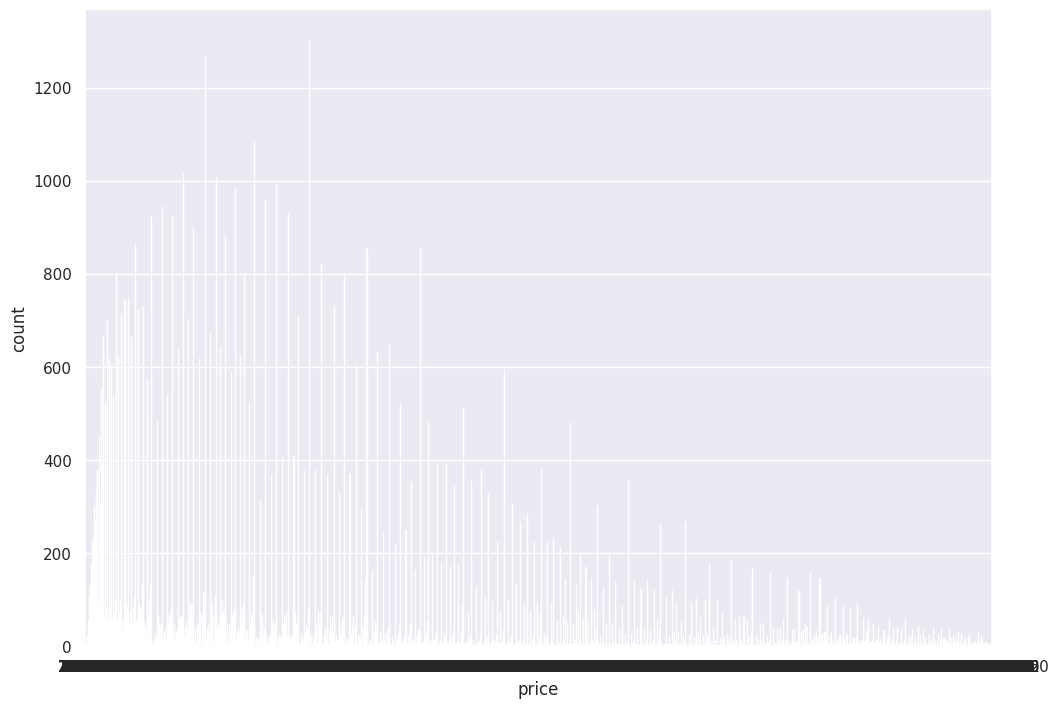

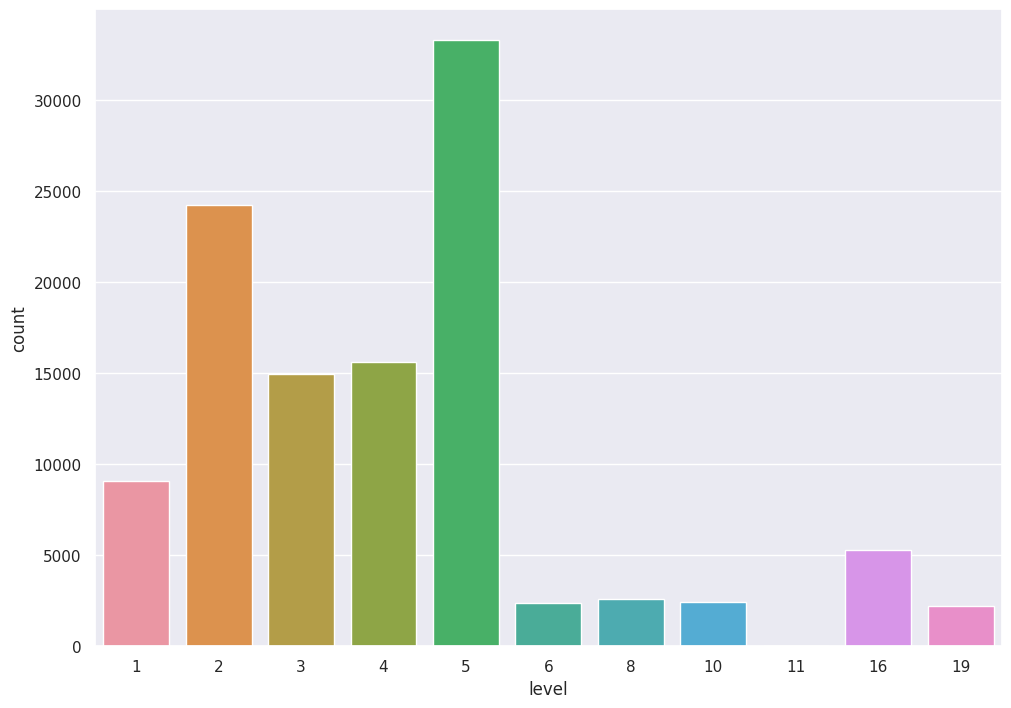

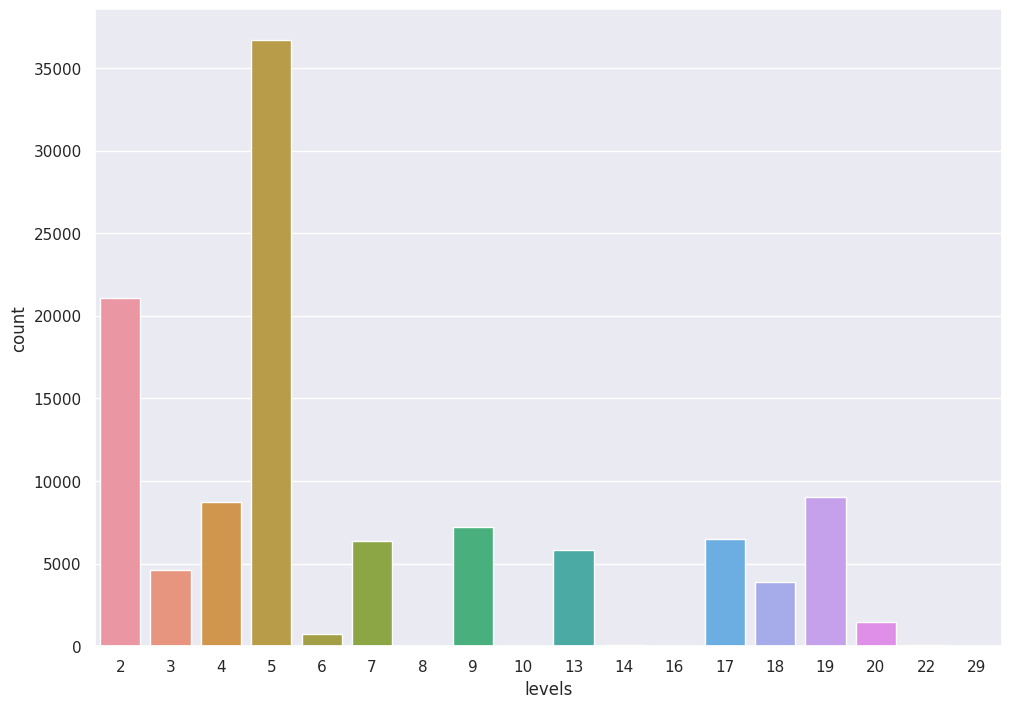

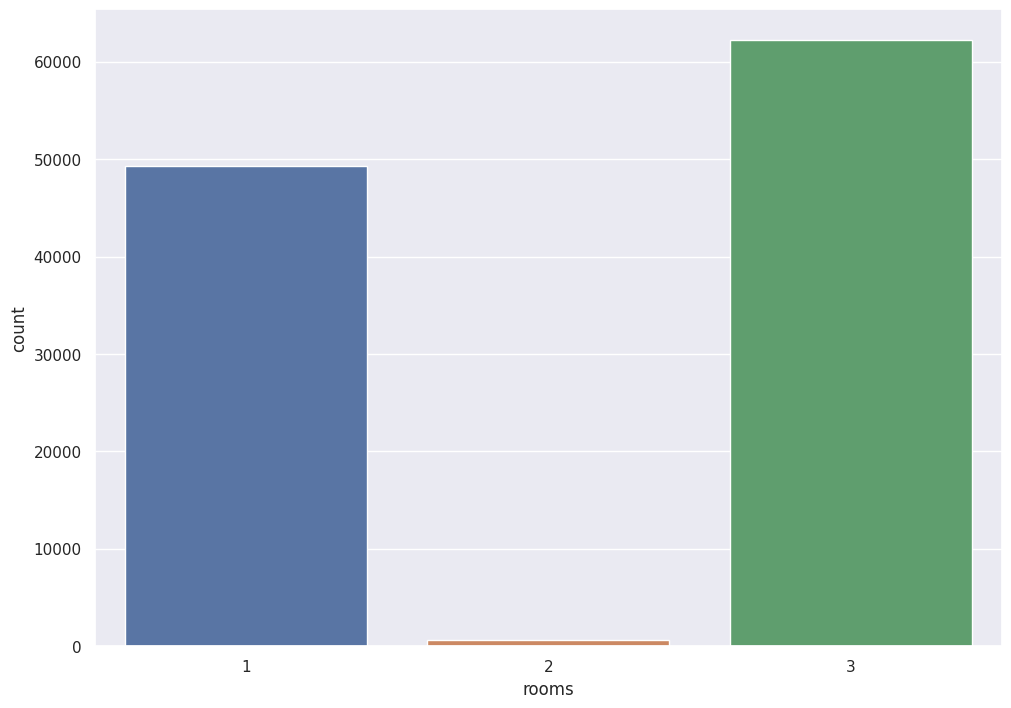

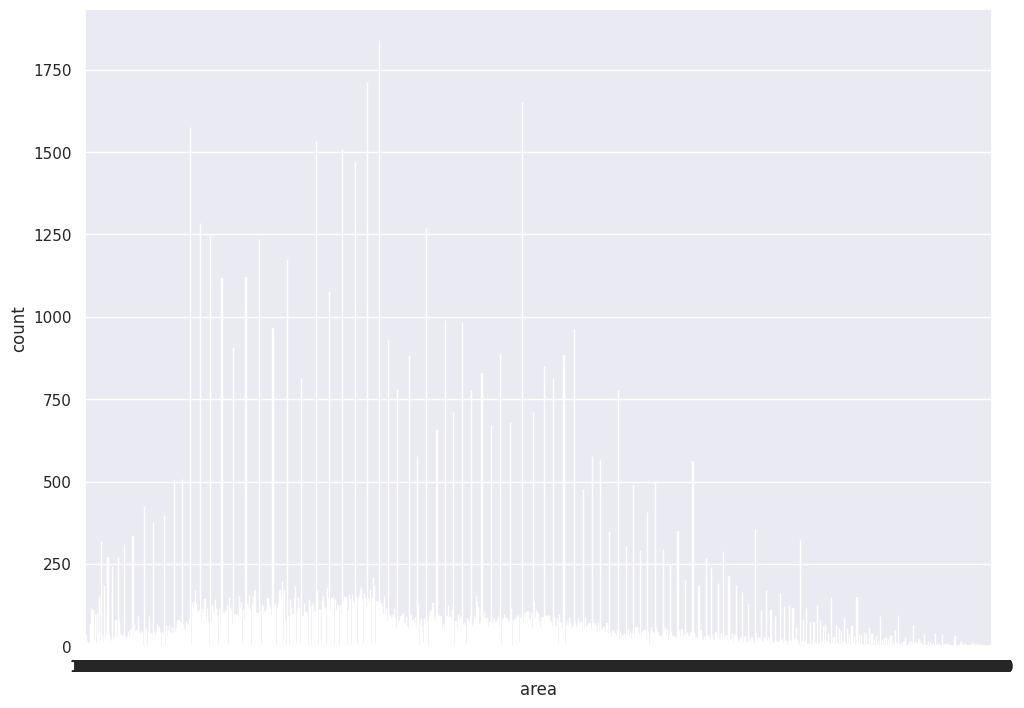

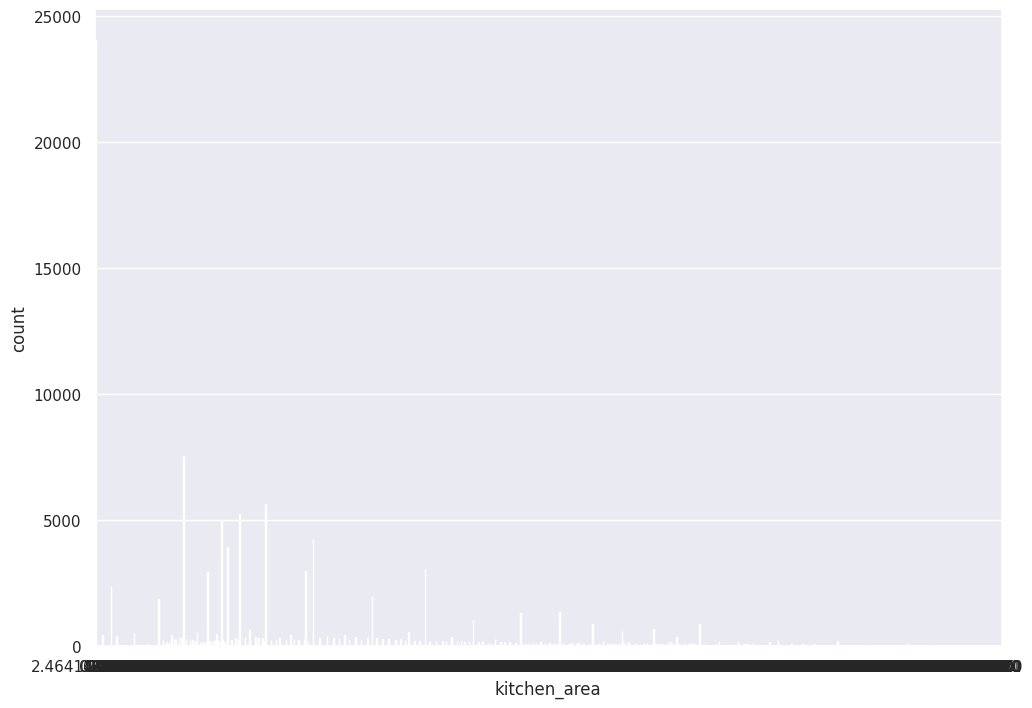

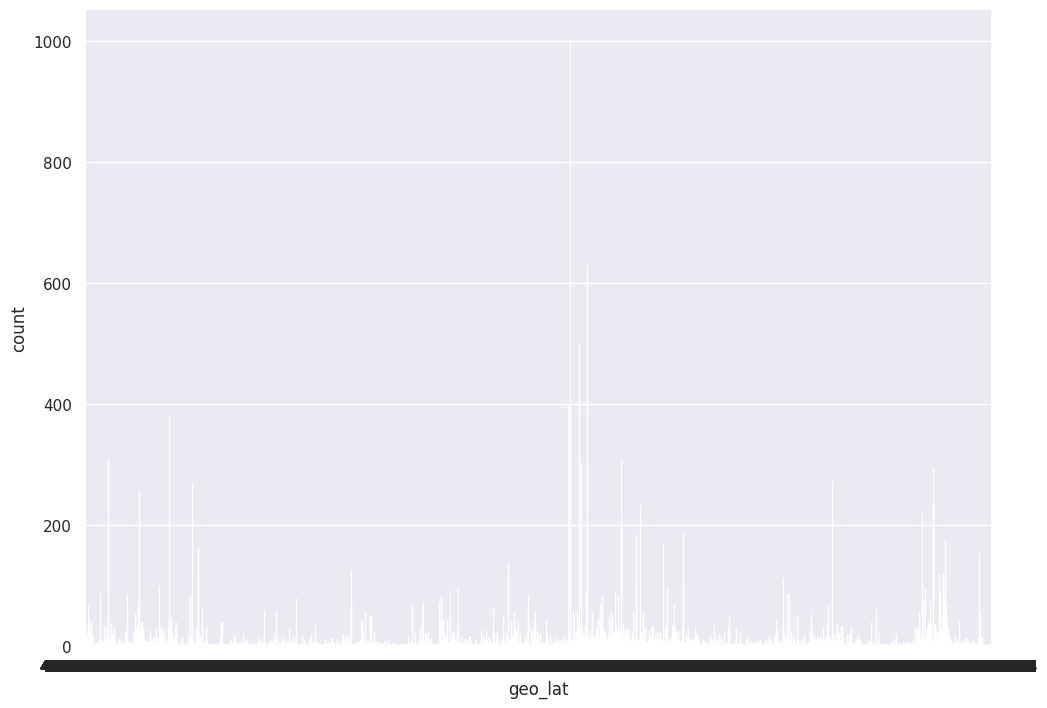

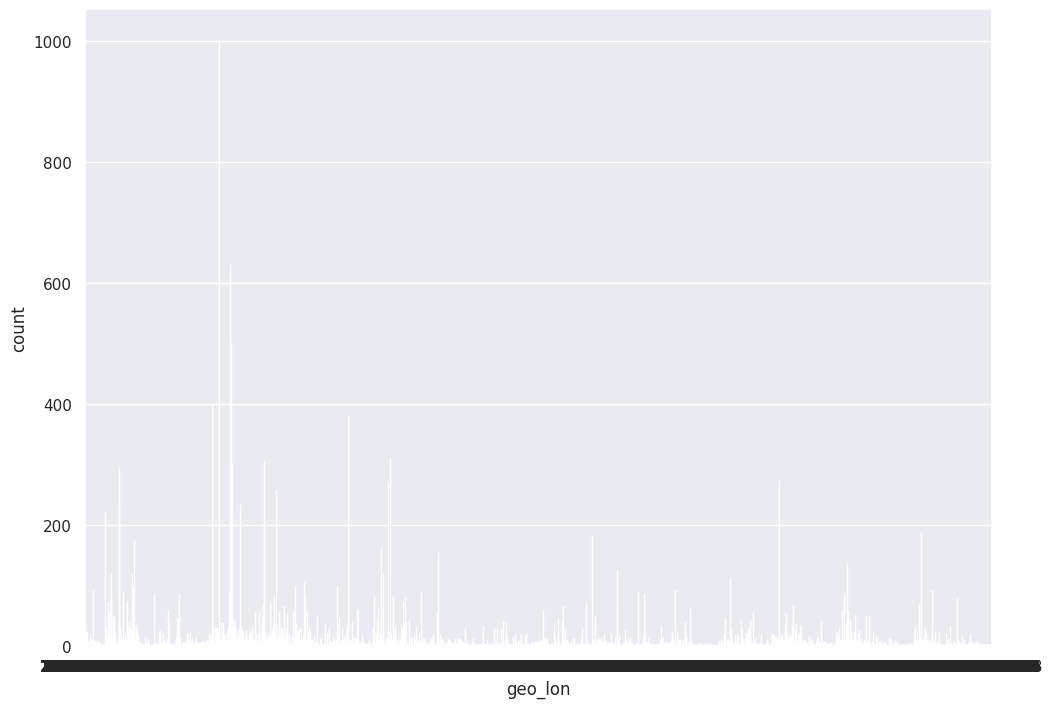

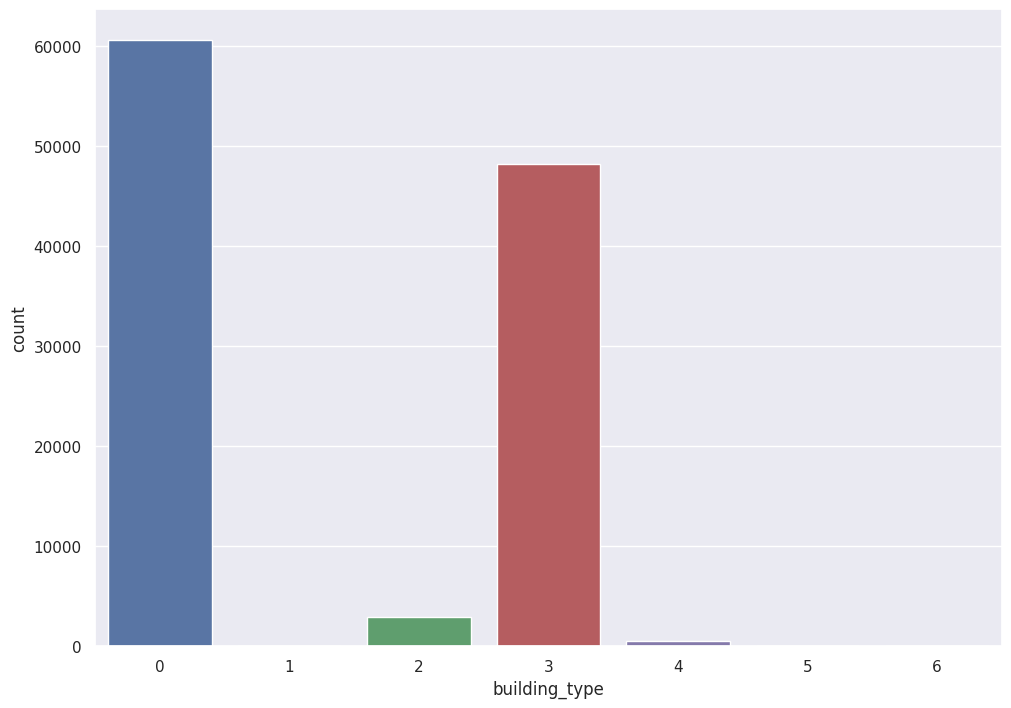

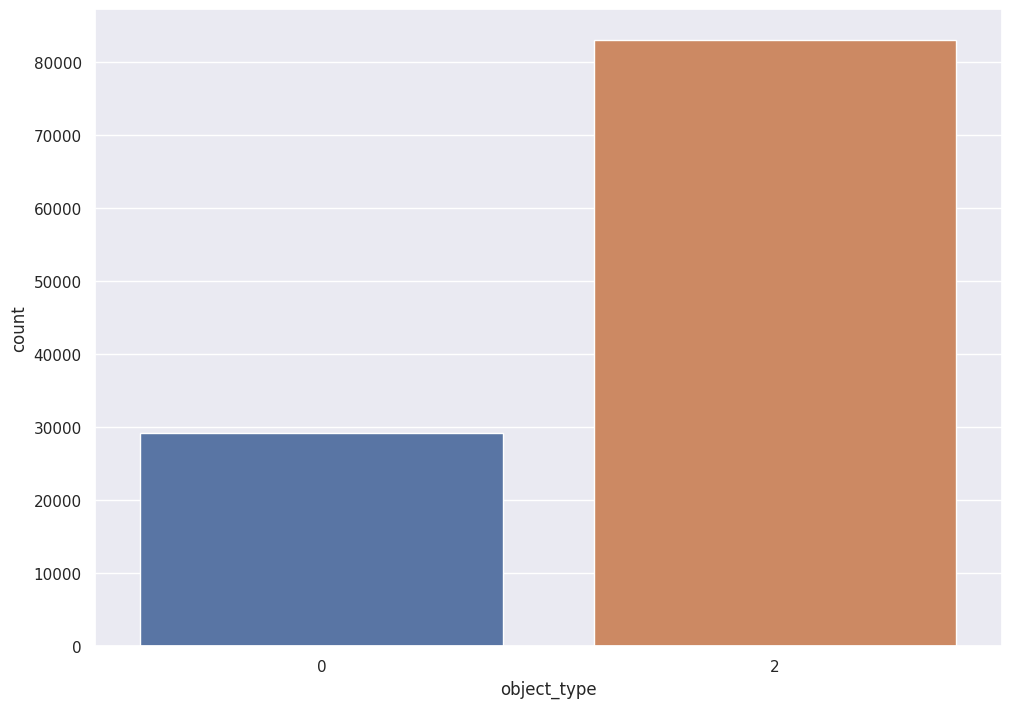

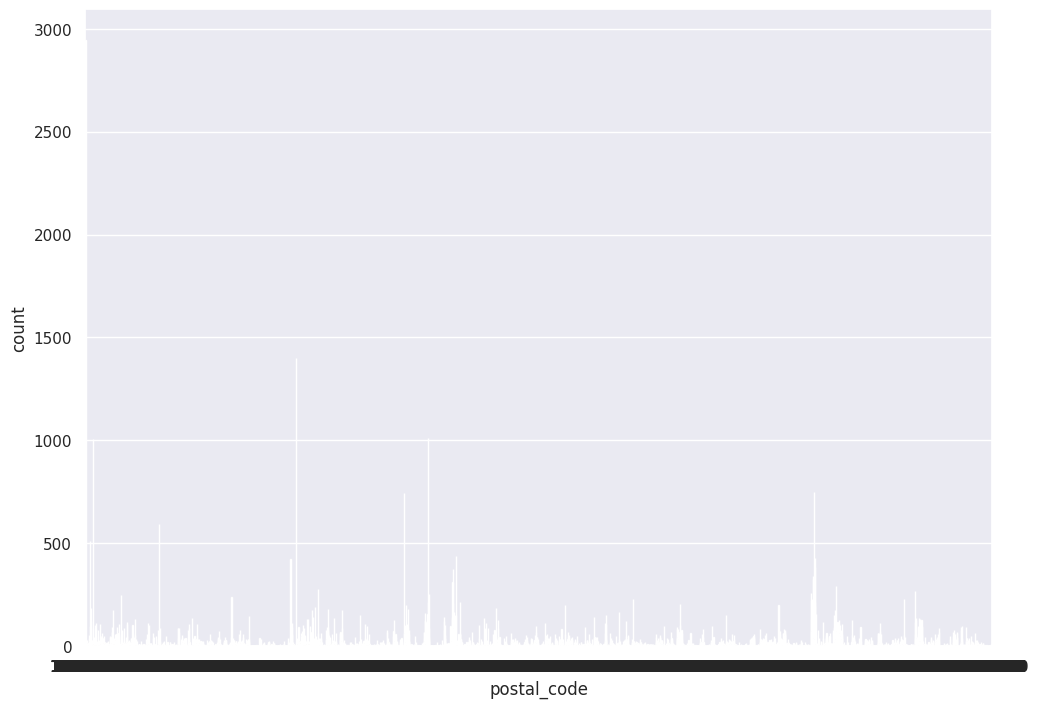

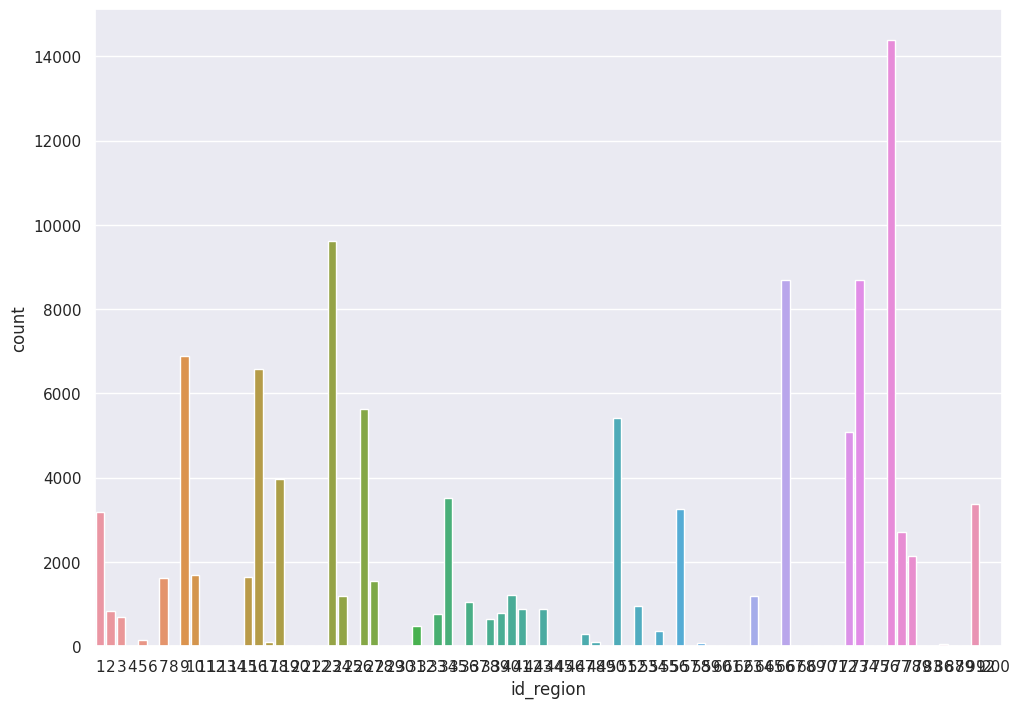

In [ ]:
for col in DF[[col for col in num_columns]]:
    sns.countplot(x=DF[col], data=DF[col]);
    plt.show()

Сильно коррелирующий признаков с целевой переменной "price" не обнаружено. Однако заметно коррелируют между собой level и levels (что очевидно), rooms и area (что тоже очевидно) и неменее заметно area и kitchen_area. Под вопросом условие отсутствия мультиколлинеарности между признаками.

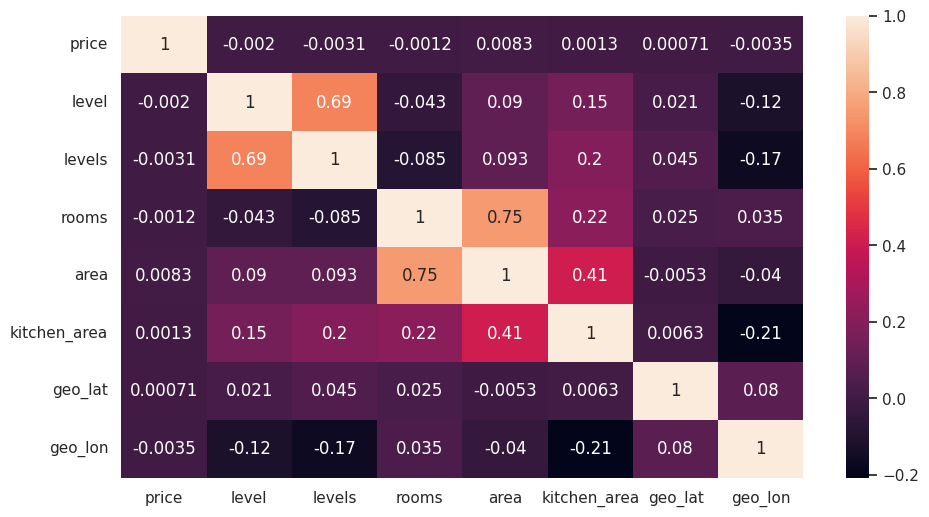

In [ ]:
corr_matrix = DF[num_columns].corr()
plt.figure(figsize=(11,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 1.4. Работа с выборосами

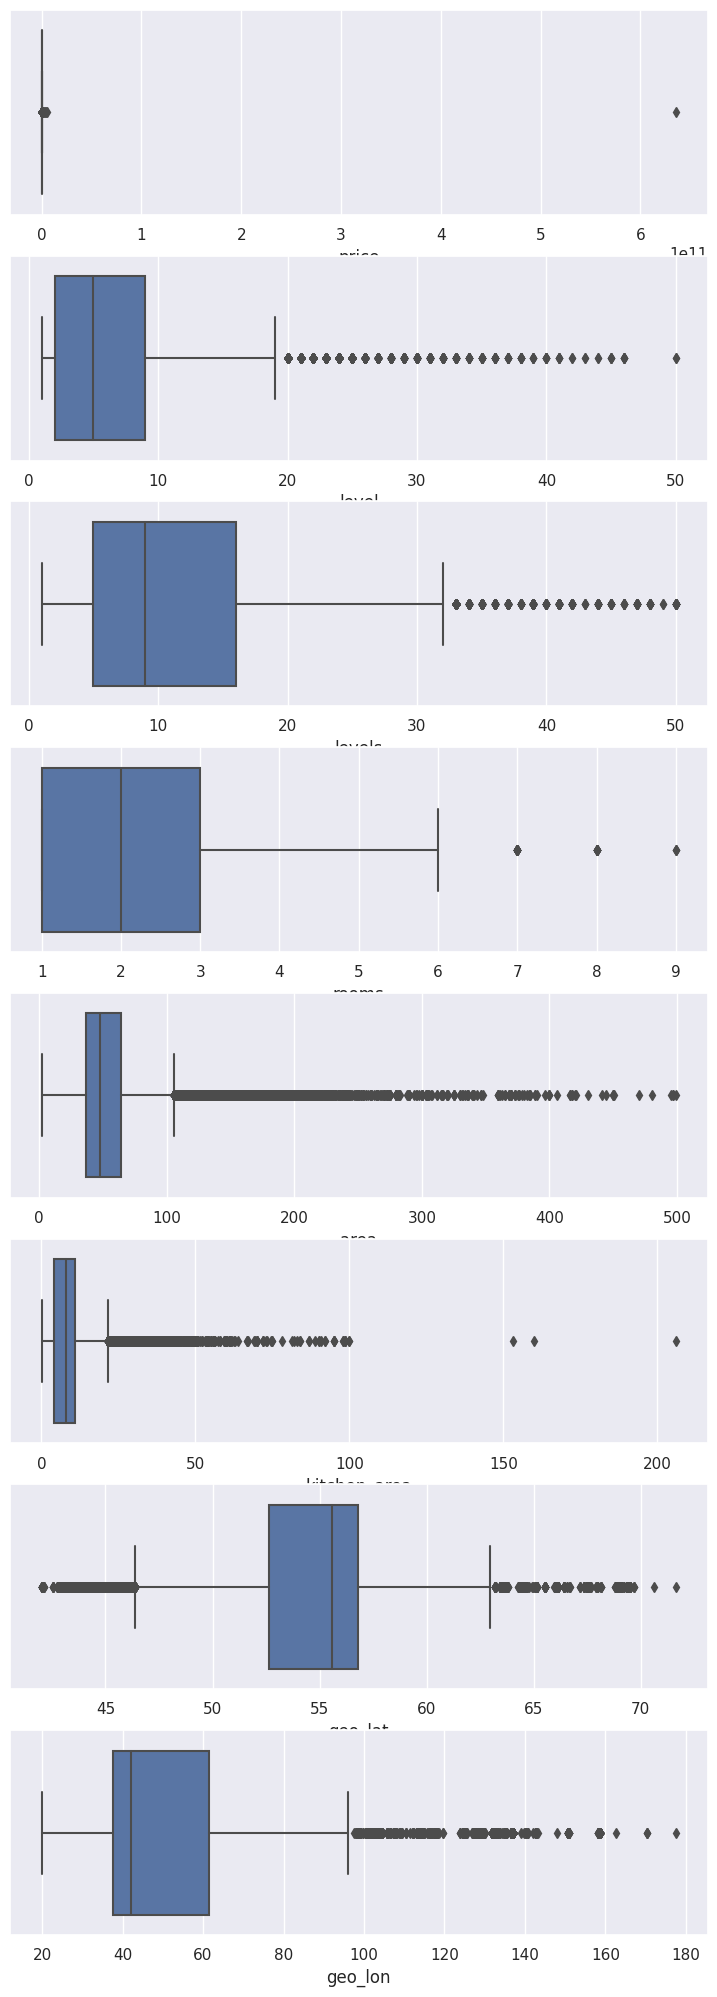

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(9,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(8,1, idx+1)
    sns.boxplot(data=DF,
            x=column_name);

Только в случае с некоторыми экстремальными значениями в price и kitchen_area мы можем говорить о присутствии выбросов. Экстремальные значения в остальных признаках вполне могут быть реальными данными.

Для выбросов опробуем две стратегии: удаление и игнорирование

In [ ]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

In [ ]:
for feature in num_columns:
    sum_outliers = len(search_outliers(DF[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {DF[feature].shape[0]} наблюдений")

Признак price содержит 10331 выбросов из 112237 наблюдений
Признак level содержит 3569 выбросов из 112237 наблюдений
Признак levels содержит 1150 выбросов из 112237 наблюдений
Признак rooms содержит 39 выбросов из 112237 наблюдений
Признак area содержит 4737 выбросов из 112237 наблюдений
Признак kitchen_area содержит 3738 выбросов из 112237 наблюдений
Признак geo_lat содержит 14893 выбросов из 112237 наблюдений
Признак geo_lon содержит 4804 выбросов из 112237 наблюдений


### Метод удаления выбросов

In [ ]:
def search_outliers_new(old_feature, new_feature):
    """Функция принимает набор значений 1-го признака каким он был до удаления выбросов,
    чтобы корректно расчитать границы выбросов
    И набор значений того же признака после удаления выбросов
    Возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(old_feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((new_feature < lower_bound) | (new_feature > upper_bound))[0]

In [ ]:
DF_del_vibros = DF.copy()
drop_index = np.array([])
print(DF_del_vibros.shape)
for feature in num_columns:
    drop_index = np.hstack((drop_index, search_outliers(DF_del_vibros[feature])))
DF_del_vibros.drop(drop_index, inplace=True)
print(DF_del_vibros.shape)

(112237, 13)
(78079, 13)


In [ ]:
for feature in num_columns:
    sum_outliers = len(search_outliers_new(DF[feature], DF_del_vibros[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {DF_del_vibros[feature].shape[0]} наблюдений")

Признак price содержит 0 выбросов из 78079 наблюдений
Признак level содержит 0 выбросов из 78079 наблюдений
Признак levels содержит 0 выбросов из 78079 наблюдений
Признак rooms содержит 0 выбросов из 78079 наблюдений
Признак area содержит 0 выбросов из 78079 наблюдений
Признак kitchen_area содержит 0 выбросов из 78079 наблюдений
Признак geo_lat содержит 0 выбросов из 78079 наблюдений
Признак geo_lon содержит 0 выбросов из 78079 наблюдений


### 1.5 Методы предварительной обработки данных

Чисто визуально кажется что числовые признаки распределены НЕ нормально, однако чтобы удостовериться проведем тест Колмагорова-Смирнова

In [ ]:
from scipy.stats import kstest

# для данных с выбросами
for feature in num_columns:
     statistic, pvalue = kstest(DF[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


In [ ]:
# для данных без выбросов
for feature in num_columns:
     statistic, pvalue = kstest(DF_del_vibros[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


Распределелние каждого признака значимо отличается от нормального

### Логарифмирование значений

In [ ]:
# для данных с выбросами
df_power  = DF.copy()
df_power[num_columns] = np.log(df_power[num_columns])

In [ ]:
df_power.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,id_region
0,2021-01-01,14.7121,2.7081,3.4340,0.0000,3.4111,-2.3026,4.0392,4.1059,0,2,620000.0,66
1,2021-01-01,14.1871,1.6094,1.6094,0.0000,3.4965,1.7918,3.7979,3.6923,0,0,385000.0,1
2,2021-01-01,16.1858,1.3863,2.5649,1.0986,4.4427,2.4849,4.0171,3.6303,3,0,142701.0,50
3,2021-01-01,14.9469,1.0986,1.6094,1.0986,4.4067,2.1972,3.7979,3.6923,0,0,385000.0,1
4,2021-01-01,14.7318,0.6931,1.0986,0.0000,3.4012,2.1972,3.8008,3.6300,3,2,353960.0,23


In [ ]:
# для данных с выбросами
for feature in num_columns:
     statistic, pvalue = kstest(df_power[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


Распределение значений признака и целевой переменной является НЕ нормальным.

In [ ]:
# для данных БЕЗ выборосов
df_del_power  = DF_del_vibros.copy()
df_del_power[num_columns] = np.log(df_del_power[num_columns])

In [ ]:
for feature in num_columns:
     statistic, pvalue = kstest(df_del_power[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


Распределение значений признака и целевой переменной даже после удаления выбросов нельзя назвать нормальным.

## 2.Регрессия методом к-Ближайших Соседей (С выбросами)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn
from sklearn.metrics import mean_absolute_error as mae # в кач-ве дополнительной метрики возьмем MAE от Scikit-learn

In [ ]:
df_num = DF[num_columns].copy() # берем, например только числовые данные

# не забываем удалить целевую переменную цену из признаков
X,y = df_num.drop(columns = ['price']).values,df_num['price'].values

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Гиперпараметры к-Ближайших Соседей{ run: "auto" }
#@markdown ### количество соседей
k = 8 #@param {type:"slider", min:1, max:20, step:1}
#@markdown ### тип весов
weights = 'distance' #@param [ 'uniform', 'distance']{type:"string"}


# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsRegressor(n_neighbors=k,
                          weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации

scores = cross_validate(kNN, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('MAE: %.1f' % mae(y_test,y_predict))


print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.1026,0.2608,-5492.4401,-6.3769e+17,-1.0979e+07,-7.0776e+10
1,0.1011,0.2764,0.1609,-7.8031e+13,-1.7964e+06,-4.4177e+08
2,0.1019,0.2931,-0.2385,-2.3486e+14,-2.0216e+06,-1.0703e+09
3,0.1037,0.2717,0.2672,-1.0766e+14,-1.9697e+06,-5.4137e+08
4,0.1257,0.2759,0.3244,-8.2634e+13,-1.8235e+06,-5.6329e+08




test_R2     -1.0984e+03
test_-MSE   -1.2764e+17
test_-MAE   -3.7180e+06
test_Max    -1.4679e+10
dtype: float64
Ошибка на тестовых данных
MSE: 1091865975723445.4
RMSE: 33043395.3
MAE: 2189107.3
R2 : -0.0346


Получившаяся модель с выбросами в данных судя по значению метрики R2 - вредительская, а это даже хуже чем отсутствие модели.  

### Отбор гиперпараметров рандамизированным поиском

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from scipy import stats

# словарь гиперпараметров в виде
# обозначение гиперпараметров : из какого распределения сэмплируем
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':stats.randint(1,50), # задаем распределение как равномерное от 1 до 50
              'weights':['uniform', 'distance']}

# количество итераций
n_iter_search = 20

kNN_search = RandomizedSearchCV(estimator = KNeighborsRegressor(),  # оптимизируем нашу модель
                                verbose = 3,  # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_distributions=parameters , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций
                          )

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END n_neighbors=24, weights=distance;, score=-870.773 total time=   0.6s
[CV 2/5] END ..n_neighbors=24, weights=distance;, score=0.516 total time=   0.5s
[CV 3/5] END ..n_neighbors=24, weights=distance;, score=0.431 total time=   0.7s
[CV 4/5] END ..n_neighbors=24, weights=distance;, score=0.500 total time=   0.9s
[CV 5/5] END ..n_neighbors=24, weights=distance;, score=0.513 total time=   0.9s
[CV 1/5] END n_neighbors=42, weights=uniform;, score=-752.666 total time=   1.1s
[CV 2/5] END n_neighbors=42, weights=uniform;, score=-313.473 total time=   1.0s
[CV 3/5] END n_neighbors=42, weights=uniform;, score=-153.248 total time=   0.7s
[CV 4/5] END ...n_neighbors=42, weights=uniform;, score=0.433 total time=   0.7s
[CV 5/5] END n_neighbors=42, weights=uniform;, score=-476.588 total time=   0.7s
[CV 1/5] END n_neighbors=15, weights=distance;, score=-1925.814 total time=   0.5s
[CV 2/5] END ..n_neighbors=15, weights=dista

In [ ]:
y_predict=kNNbest.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('MAE: %.1f' % mae(y_test,y_predict))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на тестовых данных
MSE: 1933518616012253.0
RMSE: 43971793.4
MAE: 2429618.7
R2 : -0.8321


Отбор гиперпараметров рандамизированным поиском не улучшил метрики. На качество модели повлияли выбросы в данных.

In [ ]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

Далее идет визуализация тестовых и предсказанных значений, на которой наглядно видны ошибки в предсказаниях нашей модели

<ipython-input-51-264cb6f49b70>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )


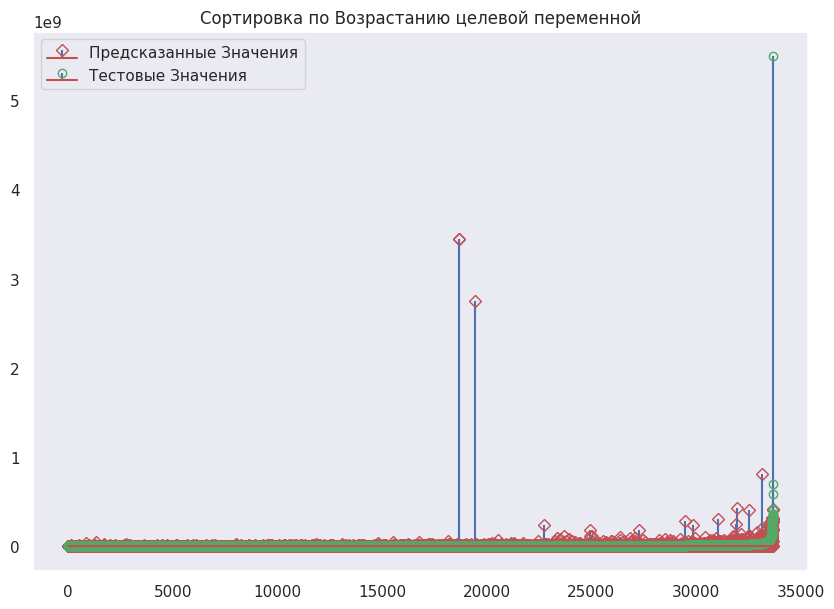

In [ ]:
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

Резульататы перебора гиперпараметров

In [ ]:
DF_reg=pd.DataFrame(kNN_search.cv_results_)
df_reg = DF_reg[['param_n_neighbors','param_weights',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = df_reg.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_n_neighbors,param_weights,mean_test_score,std_test_score,rank_test_score
3,1,uniform,-4.095900,5.507490,1
0,24,distance,-173.762501,348.505071,2
18,24,distance,-173.762501,348.505071,2
7,20,uniform,-221.207841,443.226418,4
10,20,distance,-236.733603,474.401771,5
11,48,distance,-269.169279,206.054174,6
12,40,distance,-306.784221,264.711020,7
8,43,uniform,-323.502871,248.922690,8
1,42,uniform,-339.108410,260.929013,9
14,42,uniform,-339.108410,260.929013,9


## 3. Регрессия методом к-Ближайших Соседей (БЕЗ выбросов)

In [ ]:
df_num = df_del_power[num_columns].copy() # берем, например только числовые данные

# не забываем удалить целевую переменную цену из признаков
X,y = df_num.drop(columns = ['price']).values,df_num['price'].values

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Гиперпараметры к-Ближайших Соседей{ run: "auto" }
#@markdown ### количество соседей
k = 8 #@param {type:"slider", min:1, max:20, step:1}
#@markdown ### тип весов
weights = 'distance' #@param [ 'uniform', 'distance']{type:"string"}


# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsRegressor(n_neighbors=k,
                          weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации

scores = cross_validate(kNN, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('MAE: %.1f' % mae(y_test,y_predict))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.0973,0.1819,0.6721,-0.1360,-0.2605,-2.2073
1,0.0617,0.1918,0.6605,-0.1382,-0.2618,-2.6890
2,0.0627,0.1873,0.6343,-0.1485,-0.2656,-6.6262
3,0.0627,0.2022,0.6382,-0.1500,-0.2678,-2.8291
4,0.0623,0.1798,0.6228,-0.1538,-0.2673,-7.0435




test_R2      0.6456
test_-MSE   -0.1453
test_-MAE   -0.2646
test_Max    -4.2790
dtype: float64
Ошибка на тестовых данных
MSE: 0.2
RMSE: 0.4
MAE: 0.3
R2 : 0.6283


Мы сходу получаем приемлемые метрики для модели без выбросов. От этих значений уже можно отталкиваться для улучшения качества модели.

### Оценка весов признаков модели

Попытка выявить важность отдельных признаков методом RFE из sklearn.feature_selection

In [ ]:
num_columns.pop(0)

'price'

In [ ]:
from sklearn.feature_selection import RFE

# отбор наиболее важных признаков с помощью RFE
selector = RFE(kNN, n_features_to_select=7, step=1)
selector.fit(X, y)

# вывод результатов
for feature, support in zip(num_columns, selector.support_):
    print(f"{feature}: {support}")

level: True
levels: True
rooms: True
area: True
kitchen_area: True
geo_lat: True
geo_lon: True


Вроде как все признаки полезны для построения модели. Но я могу ошибаться в своей интерпретации.

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

### 2. Отбор гиперпараметров рандамизированным поиском

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from scipy import stats

# словарь гиперпараметров в виде
# обозначение гиперпараметров : из какого распределения сэмплируем
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':stats.randint(1,50), # задаем распределение как равномерное от 1 до 50
              'weights':['uniform', 'distance']}

# количество итераций
n_iter_search = 20

kNN_search = RandomizedSearchCV(estimator = KNeighborsRegressor(),  # оптимизируем нашу модель
                                verbose = 3,  # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_distributions=parameters , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций
                          )

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..n_neighbors=29, weights=distance;, score=0.672 total time=   0.4s
[CV 2/5] END ..n_neighbors=29, weights=distance;, score=0.656 total time=   0.4s
[CV 3/5] END ..n_neighbors=29, weights=distance;, score=0.644 total time=   0.4s
[CV 4/5] END ..n_neighbors=29, weights=distance;, score=0.646 total time=   0.4s
[CV 5/5] END ..n_neighbors=29, weights=distance;, score=0.638 total time=   0.4s
[CV 1/5] END ..n_neighbors=41, weights=distance;, score=0.666 total time=   0.5s
[CV 2/5] END ..n_neighbors=41, weights=distance;, score=0.650 total time=   0.4s
[CV 3/5] END ..n_neighbors=41, weights=distance;, score=0.641 total time=   0.4s
[CV 4/5] END ..n_neighbors=41, weights=distance;, score=0.642 total time=   0.4s
[CV 5/5] END ..n_neighbors=41, weights=distance;, score=0.635 total time=   0.4s
[CV 1/5] END ..n_neighbors=42, weights=distance;, score=0.665 total time=   0.5s
[CV 2/5] END ..n_neighbors=42, weights=distance

In [ ]:
y_predict=kNNbest.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('MAE: %.1f' % mae(y_test,y_predict))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на тестовых данных
MSE: 0.2
RMSE: 0.4
MAE: 0.3
R2 : 0.6343


Рандамизированный подбор гиперпараметров незначительно улучшил R2 метрику.

Модель без выбросов делает уже не такие огромные ошибки по сравнению с предыдущей и может уловить тренд.

<ipython-input-141-264cb6f49b70>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )


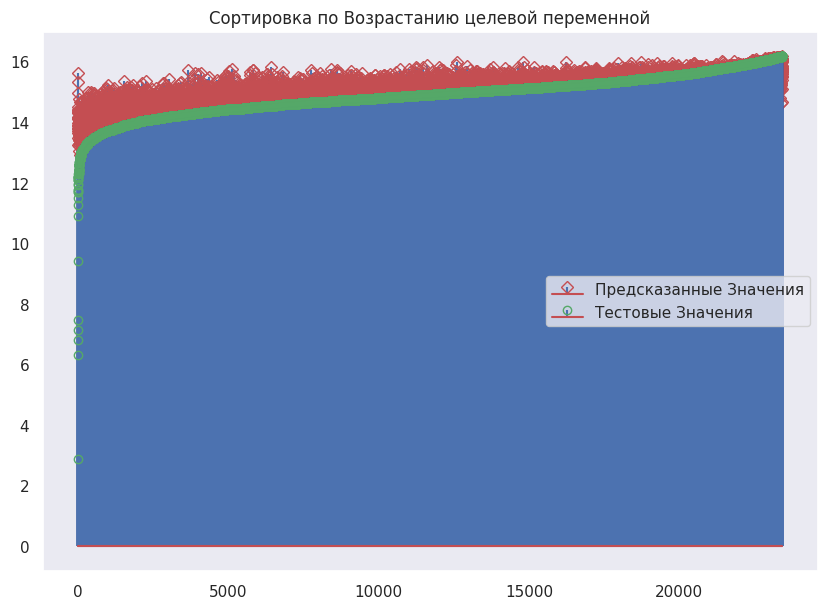

In [ ]:
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

Результаты перебора

In [ ]:
DF_reg=pd.DataFrame(kNN_search.cv_results_)
df_reg = DF_reg[['param_n_neighbors','param_weights',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = df_reg.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_n_neighbors,param_weights,mean_test_score,std_test_score,rank_test_score
0,29,distance,0.651211,0.011774,1
15,11,distance,0.650395,0.015474,2
17,33,distance,0.650198,0.011000,3
12,33,distance,0.650198,0.011000,3
10,34,distance,0.649800,0.011139,5
9,10,distance,0.648953,0.016265,6
7,37,distance,0.648742,0.010717,7
14,9,distance,0.648352,0.016926,8
5,39,distance,0.647861,0.010761,9
1,41,distance,0.646887,0.010665,10


Сохраним нашу выборку для дальнейшей работы

In [ ]:
DF_del_vibros.to_csv('/content/russia_real_estate_DF_del_vibros.csv',index=False)

In [ ]:
DF.to_csv('/content/russia_real_estate_DF.csv',index=False)